### In this lab we need to import the following libs:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import html5lib   # this lib helps to generate the table directly from the URL

In [2]:
url= 'https://www.eia.gov/dnav/pet/hist/rwtcD.htm'

In [3]:
#We use the read_html method of the Pandas library to read the HTML tables.this will return a list of df.
#skiprows skip anyrow we wish, here we set it to 0 because we need all of it(we dont need it here).
#header makes the heads of the columns
# we need to add [0] if need to select first item of returened list, because read_html return list of DataFrames:

 
df = pd.read_html(url, header=0)[5]
df

,Week Of,Mon,Tue,Wed,Thu,Fri
0,1985 Dec-30 to Jan- 3,NaN,NaN,NaN,25.56,26.00
1,1986 Jan- 6 to Jan-10,26.53,25.85,25.87,26.03,25.65
2,1986 Jan-13 to Jan-17,25.08,24.97,25.18,23.98,23.63
3,1986 Jan-20 to Jan-24,21.33,20.61,20.25,19.93,19.45
4,1986 Jan-27 to Jan-31,20.87,19.45,19.61,19.58,18.95
...,...,...,...,...,...,...
2174,2020 Sep-21 to Sep-25,39.26,39.55,39.92,40.11,40.06
2175,2020 Sep-28 to Oct- 2,40.47,39.03,40.05,38.51,36.90
2176,2020 Oct- 5 to Oct- 9,39.12,40.52,39.82,41.04,40.44
2177,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# check for Nan(missing values)
df.isnull().sum()

Week Of    363
Mon        518
Tue        379
Wed        381
Thu        408
Fri        442
dtype: int64

In [5]:
df = df.rename(columns={'Mon':'Oil_Price'})
df

,Week Of,Oil_Price,Tue,Wed,Thu,Fri
0,1985 Dec-30 to Jan- 3,NaN,NaN,NaN,25.56,26.00
1,1986 Jan- 6 to Jan-10,26.53,25.85,25.87,26.03,25.65
2,1986 Jan-13 to Jan-17,25.08,24.97,25.18,23.98,23.63
3,1986 Jan-20 to Jan-24,21.33,20.61,20.25,19.93,19.45
4,1986 Jan-27 to Jan-31,20.87,19.45,19.61,19.58,18.95
...,...,...,...,...,...,...
2174,2020 Sep-21 to Sep-25,39.26,39.55,39.92,40.11,40.06
2175,2020 Sep-28 to Oct- 2,40.47,39.03,40.05,38.51,36.90
2176,2020 Oct- 5 to Oct- 9,39.12,40.52,39.82,41.04,40.44
2177,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# mean_oil_price = subset['Oil_Price'].mean()
print(df['Oil_Price'].mean())

43.7411258278146


In [7]:
# Replacing Nan(missing values) with the mean of the column(Oil_Price)

# df['Oil_Price'].fillna(43.74, inplace=True)

In [8]:
# Checking if Nan is replaced with our mean 

df.isnull().sum()

Week Of      363
Oil_Price    518
Tue          379
Wed          381
Thu          408
Fri          442
dtype: int64

In [9]:
# checking the columns names
df.columns

Index(['Week Of', 'Oil_Price', 'Tue', 'Wed', 'Thu', 'Fri'], dtype='object')

In [10]:
# subsetting the column 'Oil_Price'. Assigned 'df' to a new variable 'subset'
subset = df.loc[:, 'Oil_Price']
subset

0         NaN
1       26.53
2       25.08
3       21.33
4       20.87
        ...  
2174    39.26
2175    40.47
2176    39.12
2177      NaN
2178    39.22
Name: Oil_Price, Length: 2179, dtype: float64

### Importing Silver csv file that was extracted from a webpage

In [11]:
silver = pd.read_csv('gld_price_data.csv')
silver

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [12]:
# extracting column('Date' & 'SLV')
silver_1 = silver.loc[:, ['Date', 'SLV']]
silver_1

,Date,SLV
0,1/2/2008,15.1800
1,1/3/2008,15.2850
2,1/4/2008,15.1670
3,1/7/2008,15.0530
4,1/8/2008,15.5900
...,...,...
2285,5/8/2018,15.5100
2286,5/9/2018,15.5300
2287,5/10/2018,15.7400
2288,5/14/2018,15.5600


In [13]:
# to match the size of both DataFrames, we extract the desired number of rows(2179)
silver_2 = silver_1.loc[0:2178]
silver_2

,Date,SLV
0,1/2/2008,15.180000
1,1/3/2008,15.285000
2,1/4/2008,15.167000
3,1/7/2008,15.053000
4,1/8/2008,15.590000
...,...,...
2174,11/15/2017,16.030001
2175,11/20/2017,15.980000
2176,11/21/2017,16.010000
2177,11/22/2017,16.170000


In [14]:
silver_2['Date']= pd.to_datetime(silver_2['Date'])
silver_2

,Date,SLV
0,2008-01-02,15.180000
1,2008-01-03,15.285000
2,2008-01-04,15.167000
3,2008-01-07,15.053000
4,2008-01-08,15.590000
...,...,...
2174,2017-11-15,16.030001
2175,2017-11-20,15.980000
2176,2017-11-21,16.010000
2177,2017-11-22,16.170000


In [15]:
#  In the case of extracting just the year from the column('Date')
# silver_2['Year'] = silver_2['Date'].dt.year
# silver_2

In [16]:
semi_final = pd.concat([silver_2, subset], axis=1)
semi_final

,Date,SLV,Oil_Price
0,2008-01-02,15.180000,NaN
1,2008-01-03,15.285000,26.53
2,2008-01-04,15.167000,25.08
3,2008-01-07,15.053000,21.33
4,2008-01-08,15.590000,20.87
...,...,...,...
2174,2017-11-15,16.030001,39.26
2175,2017-11-20,15.980000,40.47
2176,2017-11-21,16.010000,39.12
2177,2017-11-22,16.170000,NaN


In [17]:
#  Rounding the column('SLV', 'Oil_Price') to 2 decimal place
final = semi_final.round({'SLV':2, 'Oil_Price':2})
final

,Date,SLV,Oil_Price
0,2008-01-02,15.18,NaN
1,2008-01-03,15.28,26.53
2,2008-01-04,15.17,25.08
3,2008-01-07,15.05,21.33
4,2008-01-08,15.59,20.87
...,...,...,...
2174,2017-11-15,16.03,39.26
2175,2017-11-20,15.98,40.47
2176,2017-11-21,16.01,39.12
2177,2017-11-22,16.17,NaN


In [18]:
final['Year'] = final['Date'].dt.year
final

,Date,SLV,Oil_Price,Year
0,2008-01-02,15.18,NaN,2008
1,2008-01-03,15.28,26.53,2008
2,2008-01-04,15.17,25.08,2008
3,2008-01-07,15.05,21.33,2008
4,2008-01-08,15.59,20.87,2008
...,...,...,...,...
2174,2017-11-15,16.03,39.26,2017
2175,2017-11-20,15.98,40.47,2017
2176,2017-11-21,16.01,39.12,2017
2177,2017-11-22,16.17,NaN,2017


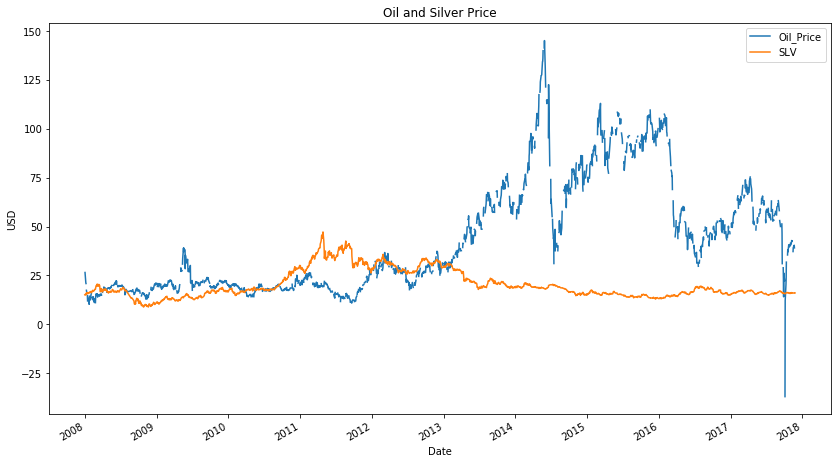

In [19]:
final.plot(x ='Date', y=['Oil_Price','SLV'], figsize=(14,8))
plt.title('Oil and Silver Price')
plt.ylabel('USD')
plt.show()

In [20]:
# we applied this function to get rid of $ signs:
#df1.Average = df1.Average.str.replace('$','').astype(float)
#df1.Low = df1.Low.str.replace('$','').astype(float)
#df1.High = df1.High.str.replace('$','').astype(float)


In [21]:
#this is to save the OilPrice column into CSV:
final.to_csv('final.data.project_csv',index=False)